In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

## Analysis

In [235]:
df_cluster = pd.read_csv('retailer_cluster.csv')
df_exposure = pd.read_csv('freq_exposition_achat_merged2.csv')

In [236]:
print(df_cluster.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1354583 non-null  int64  
 1   customer_id         1354583 non-null  object 
 2   total_sales         1354583 non-null  float64
 3   total_quantity      1354583 non-null  float64
 4   num_brands          1354583 non-null  int64  
 5   num_transactions    1354583 non-null  int64  
 6   recency             1354583 non-null  int64  
 7   purchase_frequency  1354583 non-null  float64
 8   R_score             1354583 non-null  int64  
 9   F_score             1354583 non-null  int64  
 10  M_score             1354583 non-null  int64  
 11  RFM_Score           1354583 non-null  float64
 12  Cluster             1354583 non-null  object 
dtypes: float64(4), int64(7), object(2)
memory usage: 134.4+ MB
None


In [237]:
display(df_cluster.head(10))

,Unnamed: 0,customer_id,total_sales,total_quantity,num_brands,num_transactions,recency,purchase_frequency,R_score,F_score,M_score,RFM_Score,Cluster
0,0,re0007V8sqIHsZnbvC,0.00,0.0,1,2,153,0.011050,1,1,1,1.000000,Light
1,1,re000JYhnKbTkPqMB4,0.00,0.0,1,3,174,0.016575,1,2,1,1.333333,Light
2,2,re000fIO9QXTWYjOfn,284.52,8.0,2,23,9,0.127072,3,3,3,3.000000,Heavy
3,3,re000kbtVVzPwZcEr4,0.00,0.0,1,19,36,0.104972,3,3,1,2.333333,Medium
4,4,re000pHbVOysCXRHgt,394.94,5.0,1,17,22,0.093923,3,3,3,3.000000,Heavy
5,5,re001cHwy3Mjc3HuLR,0.00,0.0,1,1,132,0.005525,1,1,1,1.000000,Light
6,6,re001dfhF1iIFRre85,0.00,0.0,1,1,100,0.005525,2,1,1,1.333333,Light
7,7,re00256gMWh8xlBxJn,0.00,0.0,1,7,34,0.038674,3,3,1,2.333333,Medium
8,8,re002BI64EJvXZLhyr,351.54,4.0,1,20,5,0.110497,3,3,3,3.000000,Heavy
9,9,re002SPjzXcRe2XY9F,65.97,2.0,1,6,92,0.033149,2,2,3,2.333333,Medium


In [238]:
print(df_exposure.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35388 non-null  int64  
 1   customer_id        35388 non-null  object 
 2   sales              35388 non-null  float64
 3   quantity           35388 non-null  float64
 4   Add to cart        35388 non-null  float64
 5   Order              35388 non-null  float64
 6   Product Page View  35388 non-null  float64
 7   freq_react         35388 non-null  float64
 8   device_id          35388 non-null  object 
 9   freq_tv            35388 non-null  int64  
 10  dsp_id             35388 non-null  object 
 11  freq_prog          35388 non-null  int64  
 12  freq_totale        35388 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 3.5+ MB
None


In [239]:
display(df_exposure.head(10))

,Unnamed: 0,customer_id,sales,quantity,Add to cart,Order,Product Page View,freq_react,device_id,freq_tv,dsp_id,freq_prog,freq_totale
0,0,re00CKn2yOaub2t96K,46.67,1.0,1.0,1.0,6.0,8.0,ctvOeSltoMMJ,2,dspjS8smJIRHKBhwamdxBzZzZh1CJi,1,3
1,1,re00aRkgItYQpIBs4v,78.98,1.0,2.0,1.0,3.0,6.0,ctv4YVSu6w48,1,dspDxWVaZM9Z4zFgpWlqyCe9YFZ6xk,1,2
2,2,re00fY6oH5hwDeHicN,172.97,3.0,4.0,3.0,16.0,23.0,ctvWuzHNZ43W,1,dspcvhk8ZfZ6nrN3eQMm2Q6pbbM2Gh,1,2
3,3,re00itkOXBMIgSS7yM,20.49,1.0,1.0,1.0,2.0,4.0,ctvz0yKxiDe6,1,dspcBhtHgoJg7gJTDZXbz8C8K2ysrS,2,3
4,4,re00qEtvplbarZyd4l,0.00,0.0,0.0,0.0,1.0,1.0,ctvVVbtu2MuP,4,dspLjyKPkZ7Ugubsr2p30xoXDaQIv8,1,5
5,5,re010o5W6JWsQq2Nke,0.00,0.0,2.0,0.0,12.0,14.0,ctv8U69yieBw,4,dsp2hRg7K8ya8rnwDnXjQ3tJkf8INo,1,5
6,6,re012Muoq9mKQlWPfh,175.97,2.0,2.0,2.0,9.0,13.0,ctvM7UVrUMbm,1,dspNAGOKX0IiVJsUSpBSmytdOoCVPV,1,2
7,7,re013Kr8KhunDrCoAe,418.32,9.0,5.0,9.0,4.0,18.0,ctvvrCfzbf3q,10,dspToKbpzMZQbwp5mEmDXqDl3Gs8Dd,2,12
8,8,re015otsriXJHU4ruM,72.98,2.0,2.0,2.0,0.0,4.0,ctv06s7A69aP,2,dspTssEGLDh1n9UtIUej1acLydfk1o,3,5
9,9,re01LvhApXxFB5SJQK,0.00,0.0,0.0,0.0,2.0,2.0,ctvdNmSSF45S,1,dspEN88px300feFUyQYtaKIB6sJ0ES,3,4


In [240]:
df_exposure_cluster = df_exposure.merge(df_cluster[['customer_id','Cluster']])
heavy = df_exposure_cluster[df_exposure_cluster['Cluster']=='Heavy']
medium = df_exposure_cluster[df_exposure_cluster['Cluster']=='Medium']
light = df_exposure_cluster[df_exposure_cluster['Cluster']=='Light']

## Plotting Cap Curve

In [241]:
# Define the bins and corresponding labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

### Capping Value analysis of "freq_totale"

#### Cluster heavy

In [242]:
heavy[['freq_totale','freq_tv', 'freq_prog', 'freq_react','Order', 'Product Page View', 'Add to cart']].describe()

,freq_totale,freq_tv,freq_prog,freq_react,Order,Product Page View,Add to cart
count,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000
mean,7.473766,3.365195,4.108571,23.020087,4.596364,12.433766,5.989957
std,8.170229,5.346478,6.210332,20.808601,3.914264,15.942204,4.993855
min,2.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,11.000000,2.000000,4.000000,3.000000
50%,4.000000,2.000000,2.000000,17.000000,4.000000,8.000000,5.000000
75%,9.000000,3.000000,4.000000,28.000000,6.000000,15.000000,7.000000
max,88.000000,87.000000,79.000000,410.000000,45.000000,342.000000,59.000000


In [243]:
# Create the binned column
heavy['freq_bins'] = pd.cut(heavy['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(heavy[['freq_totale', 'freq_bins']].head())

    freq_totale freq_bins
0             3       0-5
2             2       0-5
6             2       0-5
7            12     10-15
10            2       0-5


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\843578354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heavy['freq_bins'] = pd.cut(heavy['freq_totale'], bins=bins, labels=labels, right=False)


freq_bins
0-5        22.089980
5-10       22.659905
10-15      23.008264
15-20      25.644860
20-30      27.509225
30-40      32.027273
40-50      22.178571
50-100     32.000000
100-200          NaN
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1866992136.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heavy_totale_avg_reactions_per_bin = heavy.groupby('freq_bins')['freq_react'].mean()


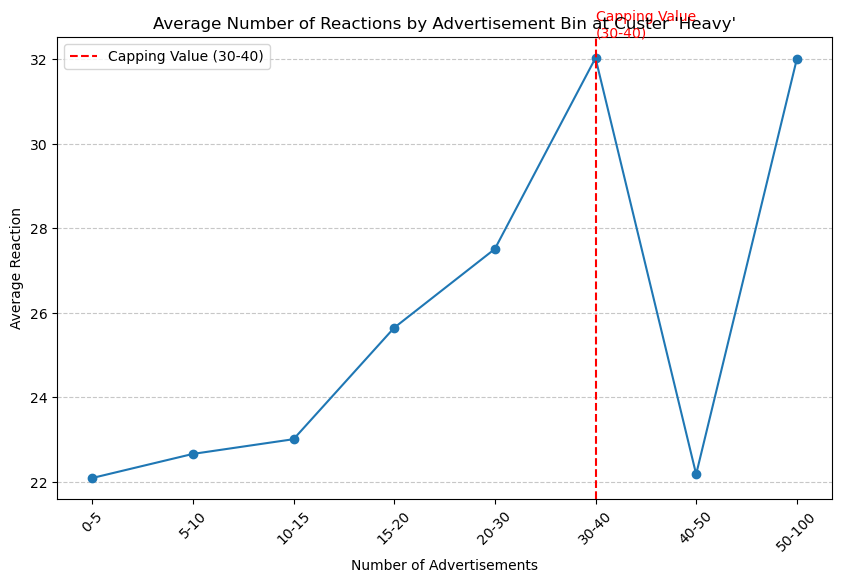

In [244]:
heavy_totale_avg_reactions_per_bin = heavy.groupby('freq_bins')['freq_react'].mean()
heavy_totale_avg_reactions_per_bin_df = heavy_totale_avg_reactions_per_bin.reset_index()
heavy_totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(heavy_totale_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
heavy_totale_max_reaction_index = heavy_totale_avg_reactions_per_bin_df['Average Reactions'].idxmax()
heavy_totale_capping_bin = heavy_totale_avg_reactions_per_bin_df.iloc[heavy_totale_max_reaction_index]['Frequency Bin']
heavy_totale_capping_reaction = heavy_totale_avg_reactions_per_bin_df.iloc[heavy_totale_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(heavy_totale_avg_reactions_per_bin_df['Frequency Bin'], heavy_totale_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Custer 'Heavy'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=heavy_totale_capping_bin, color='red', linestyle='--', label=f"Capping Value ({heavy_totale_capping_bin})")
plt.annotate(f'Capping Value\n({heavy_totale_capping_bin})', 
             xy=(heavy_totale_capping_bin, heavy_totale_capping_reaction), 
             xytext=(heavy_totale_capping_bin, heavy_totale_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The capping value of "freq_totale" is in bin 30 - 40 over customer segment 'heavy'.

#### Cluster medium

In [245]:
medium[['freq_totale','freq_tv', 'freq_prog', 'freq_react','Order', 'Product Page View', 'Add to cart']].describe()

,freq_totale,freq_tv,freq_prog,freq_react,Order,Product Page View,Add to cart
count,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000
mean,7.289685,3.346937,3.942748,9.677334,1.372284,6.270699,2.034351
std,8.188040,5.541228,6.102157,8.949726,1.461182,7.356664,2.085313
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,1.000000
50%,4.000000,2.000000,2.000000,7.000000,1.000000,4.000000,2.000000
75%,9.000000,3.000000,4.000000,12.000000,2.000000,8.000000,3.000000
max,163.000000,162.000000,131.000000,137.000000,20.000000,127.000000,27.000000


In [246]:
# Create the binned column
medium['freq_bins'] = pd.cut(medium['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(medium[['freq_totale', 'freq_bins']].head())

    freq_totale freq_bins
1             2       0-5
5             5      5-10
8             5      5-10
11            7      5-10
12           13     10-15


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\515755842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['freq_bins'] = pd.cut(medium['freq_totale'], bins=bins, labels=labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2686435104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medium_totale_avg_reactions_per_bin = medium.groupby('freq_bins')['freq_react'].mean()


freq_bins
0-5         9.309119
5-10        9.730810
10-15      10.405634
15-20      10.304505
20-30      10.869469
30-40       9.787402
40-50       8.285714
50-100     12.000000
100-200     7.000000
Name: freq_react, dtype: float64

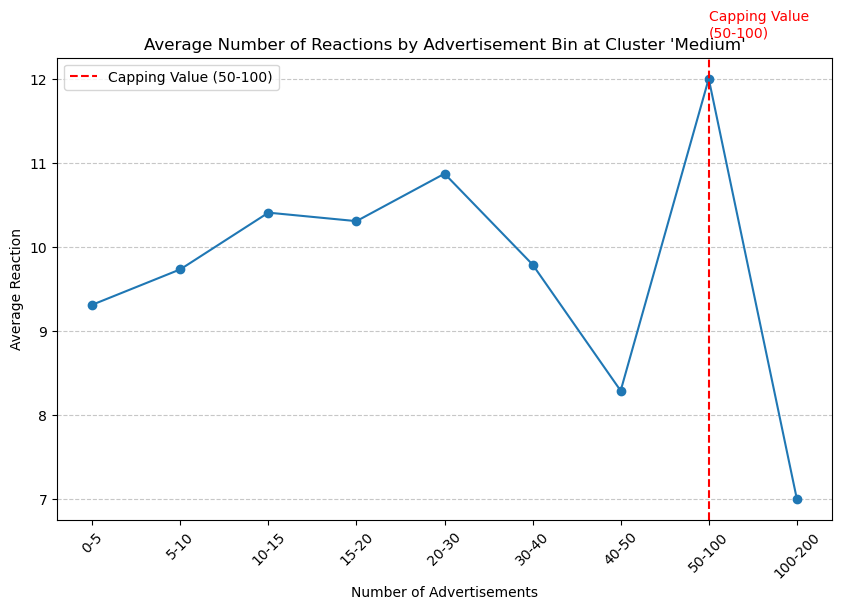

In [247]:
medium_totale_avg_reactions_per_bin = medium.groupby('freq_bins')['freq_react'].mean()
medium_totale_avg_reactions_per_bin_df = medium_totale_avg_reactions_per_bin.reset_index()
medium_totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(medium_totale_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
medium_totale_max_reaction_index = medium_totale_avg_reactions_per_bin_df['Average Reactions'].idxmax()
medium_totale_capping_bin = medium_totale_avg_reactions_per_bin_df.iloc[medium_totale_max_reaction_index]['Frequency Bin']
medium_totale_capping_reaction = medium_totale_avg_reactions_per_bin_df.iloc[medium_totale_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(medium_totale_avg_reactions_per_bin_df['Frequency Bin'], medium_totale_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Medium'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=medium_totale_capping_bin, color='red', linestyle='--', label=f"Capping Value ({medium_totale_capping_bin})")
plt.annotate(f'Capping Value\n({medium_totale_capping_bin})', 
             xy=(medium_totale_capping_bin, medium_totale_capping_reaction), 
             xytext=(medium_totale_capping_bin, medium_totale_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

In [248]:
# Define finer bins between 50 and 100
fine_medium_totale_bins = [50, 60, 70, 80, 90, 100]
fine_medium_totale_labels = ["50-60", "60-70", "70-80", "80-90", "90-100"]

# Create new binned column
medium['fine_freq_bins'] = pd.cut(medium['freq_totale'], bins=fine_medium_totale_bins, labels=fine_medium_totale_labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2284803236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fine_freq_bins'] = pd.cut(medium['freq_totale'], bins=fine_medium_totale_bins, labels=fine_medium_totale_labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\4173611921.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_medium_totale_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()


fine_freq_bins
50-60     10.571429
60-70      8.777778
70-80      4.200000
80-90     22.166667
90-100    21.400000
Name: freq_react, dtype: float64


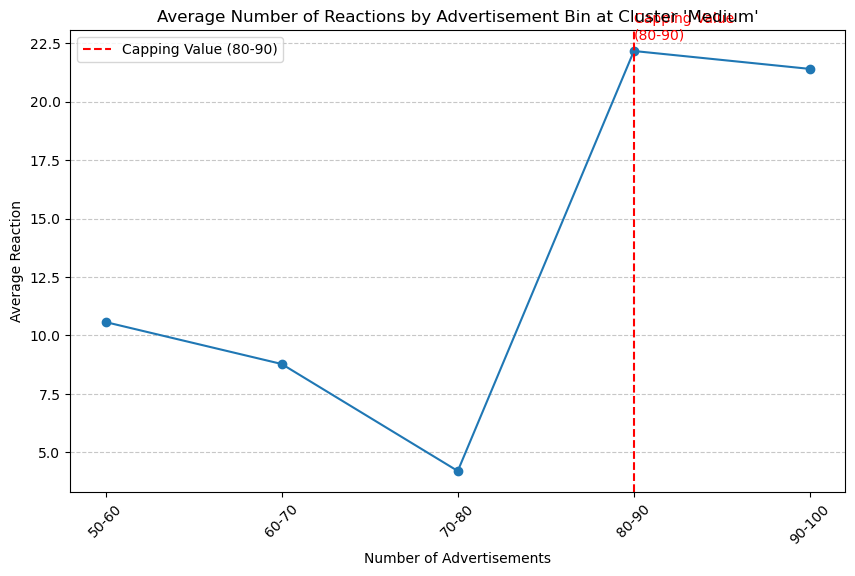

In [249]:
# Calculate the average reactions per finer bin
fine_medium_totale_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()
fine_medium_totale_avg_reactions_per_bin_df = fine_medium_totale_avg_reactions_per_bin.reset_index()
fine_medium_totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(fine_medium_totale_avg_reactions_per_bin)

# Highlight the new capping bin
fine_medium_totale_max_reaction_index = fine_medium_totale_avg_reactions_per_bin_df['Average Reactions'].idxmax()
fine_medium_totale_capping_bin = fine_medium_totale_avg_reactions_per_bin_df.iloc[fine_medium_totale_max_reaction_index]['Frequency Bin']
fine_medium_totale_capping_reaction = fine_medium_totale_avg_reactions_per_bin_df.iloc[fine_medium_totale_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(fine_medium_totale_avg_reactions_per_bin_df['Frequency Bin'], fine_medium_totale_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Medium'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=fine_medium_totale_capping_bin, color='red', linestyle='--', label=f"Capping Value ({fine_medium_totale_capping_bin})")
plt.annotate(f'Capping Value\n({fine_medium_totale_capping_bin})', 
             xy=(fine_medium_totale_capping_bin, fine_medium_totale_capping_reaction), 
             xytext=(fine_medium_totale_capping_bin, fine_medium_totale_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The capping value of "freq_totale" is in bin 80 - 90 over customer segment 'medium'.

#### Cluster light

In [250]:
light[['freq_totale','freq_tv', 'freq_prog', 'freq_react','Order', 'Product Page View', 'Add to cart']].describe()

,freq_totale,freq_tv,freq_prog,freq_react,Order,Product Page View,Add to cart
count,19395.000000,19395.000000,19395.000000,19395.000000,19395.000000,19395.000000,19395.000000
mean,8.401908,3.440681,4.961227,2.178345,0.031348,1.966074,0.180923
std,9.624528,5.687972,7.776483,2.432338,0.178356,2.208990,0.537744
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,5.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,10.000000,4.000000,5.000000,2.000000,0.000000,2.000000,0.000000
max,160.000000,158.000000,135.000000,68.000000,2.000000,61.000000,12.000000


In [251]:
# Create the binned column
light['freq_bins'] = pd.cut(light['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(light[['freq_totale', 'freq_bins']].head())

    freq_totale freq_bins
3             3       0-5
4             5      5-10
9             4       0-5
14            3       0-5
15            7      5-10


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\3088195742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['freq_bins'] = pd.cut(light['freq_totale'], bins=bins, labels=labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\3492248324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  light_totale_avg_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()


freq_bins
0-5        2.186631
5-10       2.171995
10-15      2.204914
15-20      2.163462
20-30      2.072761
30-40      2.051220
40-50      2.403409
50-100     2.401235
100-200    3.222222
Name: freq_react, dtype: float64


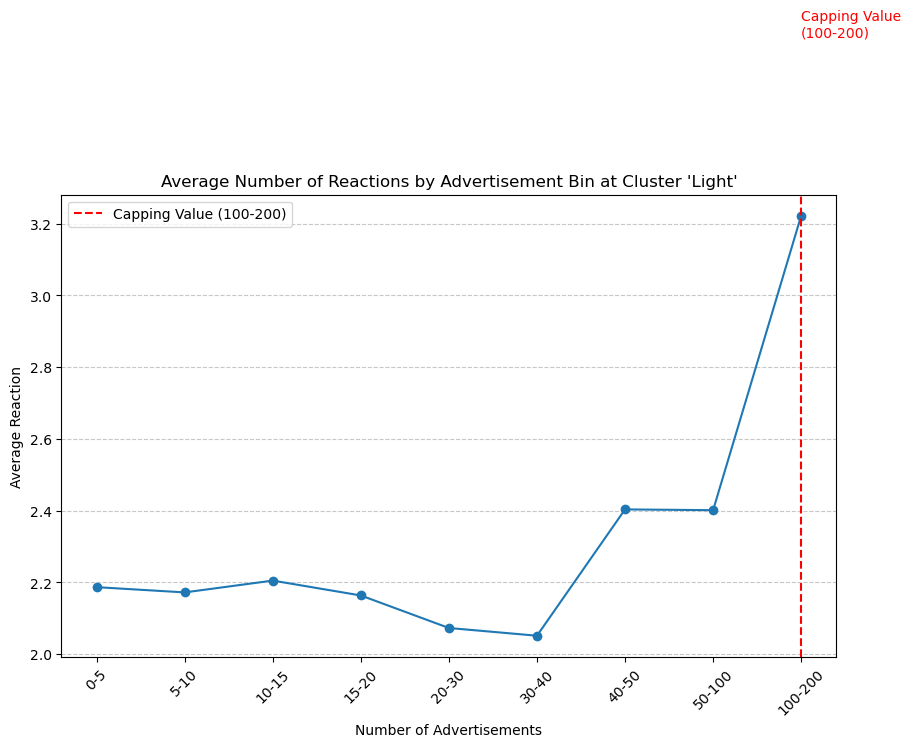

In [252]:
light_totale_avg_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()
light_totale_avg_reactions_per_bin_df = light_totale_avg_reactions_per_bin.reset_index()
light_totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(light_totale_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
light_totale_max_reaction_index = light_totale_avg_reactions_per_bin_df['Average Reactions'].idxmax()
light_totale_capping_bin = light_totale_avg_reactions_per_bin_df.iloc[light_totale_max_reaction_index]['Frequency Bin']
light_totale_capping_reaction = light_totale_avg_reactions_per_bin_df.iloc[light_totale_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(light_totale_avg_reactions_per_bin_df['Frequency Bin'], light_totale_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Light'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=light_totale_capping_bin, color='red', linestyle='--', label=f"Capping Value ({light_totale_capping_bin})")
plt.annotate(f'Capping Value\n({light_totale_capping_bin})', 
             xy=(light_totale_capping_bin, light_totale_capping_reaction), 
             xytext=(light_totale_capping_bin, light_totale_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

###### Conclusion: The capping value of freq_totale is in bin 50 - 100 over customer segment 'leight'. This is not very accuarte and will be further investigated.

In [253]:
# Define finer bins between 100 and 200
fine_light_totale_bins = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
fine_light_totale_labels = ["100-110", "110-120", "120-130", "130-140", "140-150", "150-160", "160-170", "170-180", "180-190", "190-200"]

# Create new binned column
light['fine_freq_bins'] = pd.cut(light['freq_totale'], bins=fine_light_totale_bins, labels=fine_light_totale_labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\208018295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['fine_freq_bins'] = pd.cut(light['freq_totale'], bins=fine_light_totale_bins, labels=fine_light_totale_labels, right=False)


fine_freq_bins
100-110    6.0
110-120    3.0
120-130    NaN
130-140    1.0
140-150    NaN
150-160    NaN
160-170    3.0
170-180    NaN
180-190    NaN
190-200    NaN
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2313116345.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_light_totale_avg_reactions_per_bin = light.groupby('fine_freq_bins')['freq_react'].mean()


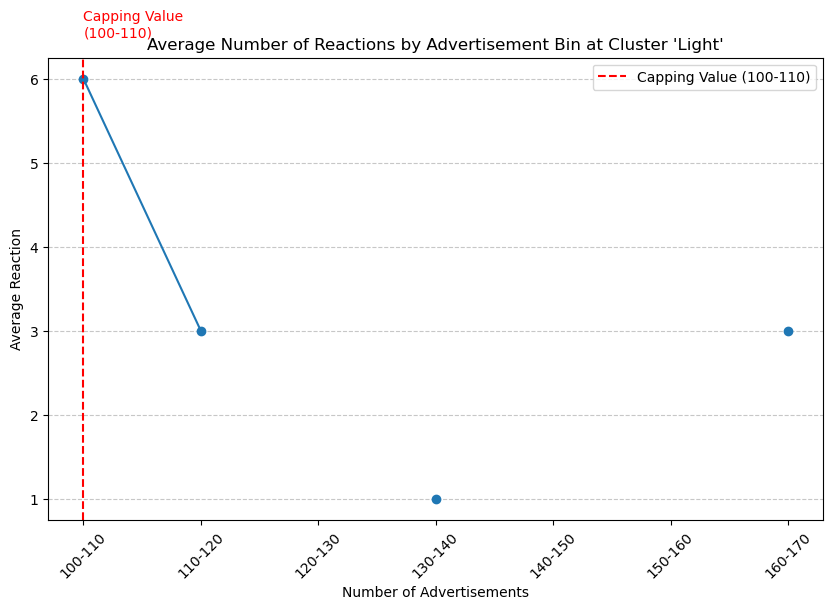

In [254]:
# Calculate the average reactions per finer bin
fine_light_totale_avg_reactions_per_bin = light.groupby('fine_freq_bins')['freq_react'].mean()
fine_light_totale_avg_reactions_per_bin_df = fine_light_totale_avg_reactions_per_bin.reset_index()
fine_light_totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(fine_light_totale_avg_reactions_per_bin)

# Highlight the new capping bin
fine_light_totale_max_reaction_index = fine_light_totale_avg_reactions_per_bin_df['Average Reactions'].idxmax()
fine_light_totale_capping_bin = fine_light_totale_avg_reactions_per_bin_df.iloc[fine_light_totale_max_reaction_index]['Frequency Bin']
fine_light_totale_capping_reaction = fine_light_totale_avg_reactions_per_bin_df.iloc[fine_light_totale_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(fine_light_totale_avg_reactions_per_bin_df['Frequency Bin'], fine_light_totale_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Light'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=fine_light_totale_capping_bin, color='red', linestyle='--', label=f"Capping Value ({fine_light_totale_capping_bin})")
plt.annotate(f'Capping Value\n({fine_light_totale_capping_bin})', 
             xy=(fine_light_totale_capping_bin, fine_light_totale_capping_reaction), 
             xytext=(fine_light_totale_capping_bin, fine_light_totale_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

###### Conclusion: The capping value of freq_totale is in bin 100 - 110 over customer segment 'light'.

### Capping Value analysis of "freq_tv"

#### Cluster heavy

In [255]:
# Create the binned column
heavy['freq_bins'] = pd.cut(heavy['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(heavy[['freq_tv', 'freq_bins']].head())

    freq_tv freq_bins
0         2       0-5
2         1       0-5
6         1       0-5
7        10     10-15
10        1       0-5


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2135616643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heavy['freq_bins'] = pd.cut(heavy['freq_tv'], bins=bins, labels=labels, right=False)


freq_bins
0-5        23.335667
5-10       21.179217
10-15      22.893401
15-20      22.315789
20-30      19.609756
30-40      19.619048
40-50      26.384615
50-100     36.444444
100-200          NaN
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\214090653.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heavy_tv_avg_reactions_per_bin = heavy.groupby('freq_bins')['freq_react'].mean()


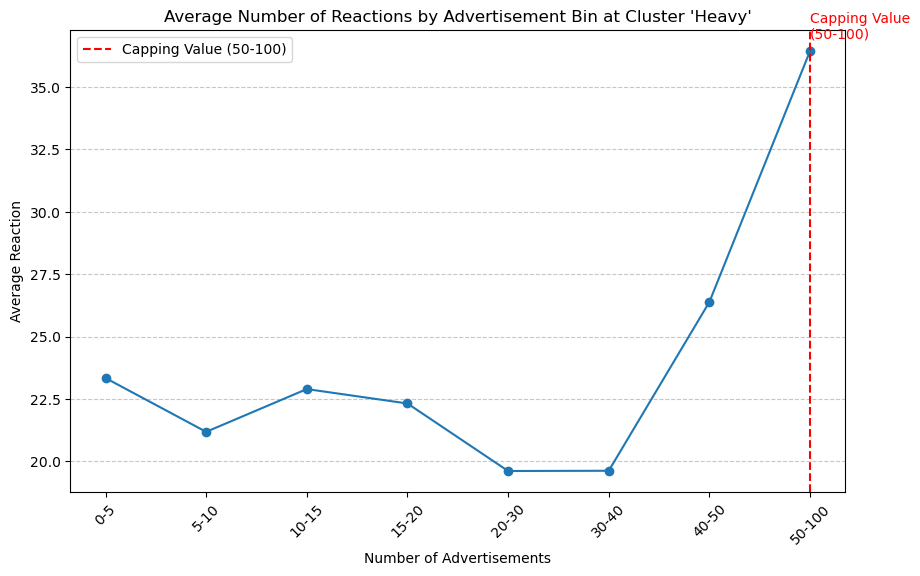

In [256]:
heavy_tv_avg_reactions_per_bin = heavy.groupby('freq_bins')['freq_react'].mean()
heavy_tv_avg_reactions_per_bin_df = heavy_tv_avg_reactions_per_bin.reset_index()
heavy_tv_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(heavy_tv_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
heavy_tv_max_reaction_index = heavy_tv_avg_reactions_per_bin_df['Average Reactions'].idxmax()
heavy_tv_capping_bin = heavy_tv_avg_reactions_per_bin_df.iloc[heavy_tv_max_reaction_index]['Frequency Bin']
heavy_tv_capping_reaction = heavy_tv_avg_reactions_per_bin_df.iloc[heavy_tv_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(heavy_tv_avg_reactions_per_bin_df['Frequency Bin'], heavy_tv_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Heavy'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=heavy_tv_capping_bin, color='red', linestyle='--', label=f"Capping Value ({heavy_tv_capping_bin})")
plt.annotate(f'Capping Value\n({heavy_tv_capping_bin})', 
             xy=(heavy_tv_capping_bin, heavy_tv_capping_reaction), 
             xytext=(heavy_tv_capping_bin, heavy_tv_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

In [257]:
# Define finer bins between 50 and 100
fine_heavy_tv_bins = [50, 60, 70, 80, 90, 100]
fine_heavy_tv_labels = ["50-60", "60-70", "70-80", "80-90", "90-100"]

# Create new binned column
medium['fine_freq_bins'] = pd.cut(medium['freq_tv'], bins=fine_heavy_tv_bins, labels=fine_heavy_tv_labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2123024352.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fine_freq_bins'] = pd.cut(medium['freq_tv'], bins=fine_heavy_tv_bins, labels=fine_heavy_tv_labels, right=False)


fine_freq_bins
50-60      9.818182
60-70     10.250000
70-80      3.666667
80-90     12.000000
90-100    20.000000
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\770254349.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_heavy_tv_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()


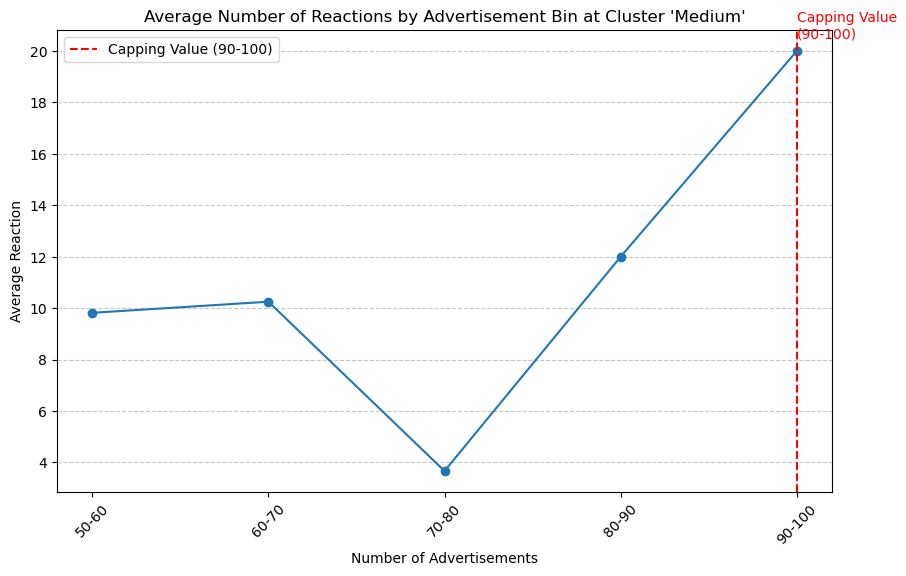

In [222]:
# Calculate the average reactions per finer bin
fine_heavy_tv_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()
fine_heavy_tv_avg_reactions_per_bin_df = fine_heavy_tv_avg_reactions_per_bin.reset_index()
fine_heavy_tv_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(fine_heavy_tv_avg_reactions_per_bin)

# Highlight the new capping bin
fine_heavy_tv_max_reaction_index = fine_heavy_tv_avg_reactions_per_bin_df['Average Reactions'].idxmax()
fine_heavy_tv_capping_bin = fine_heavy_tv_avg_reactions_per_bin_df.iloc[fine_heavy_tv_max_reaction_index]['Frequency Bin']
fine_heavy_tv_capping_reaction = fine_heavy_tv_avg_reactions_per_bin_df.iloc[fine_heavy_tv_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(fine_heavy_tv_avg_reactions_per_bin_df['Frequency Bin'], fine_heavy_tv_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Medium'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=fine_heavy_tv_capping_bin, color='red', linestyle='--', label=f"Capping Value ({fine_heavy_tv_capping_bin})")
plt.annotate(f'Capping Value\n({fine_heavy_tv_capping_bin})', 
             xy=(fine_heavy_tv_capping_bin, fine_heavy_tv_capping_reaction), 
             xytext=(fine_heavy_tv_capping_bin, fine_heavy_tv_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The capping value of "freq_tv" is in interval 90 - 100 over customer segment 'heavy'.

#### Cluster medium

In [230]:
# Create the binned column
medium['freq_bins'] = pd.cut(medium['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(medium[['freq_tv', 'freq_bins']].head())

    freq_tv freq_bins
1         1       0-5
5         4       0-5
8         2       0-5
11        1       0-5
12       12     10-15


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\4177592122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['freq_bins'] = pd.cut(medium['freq_tv'], bins=bins, labels=labels, right=False)


freq_bins
0-5        9.789853
5-10       9.345679
10-15      8.867052
15-20      8.732877
20-30      9.008130
30-40      9.100000
40-50      8.944444
50-100     9.714286
100-200    7.000000
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2990659406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medium_tv_avg_reactions_per_bin = medium.groupby('freq_bins')['freq_react'].mean()


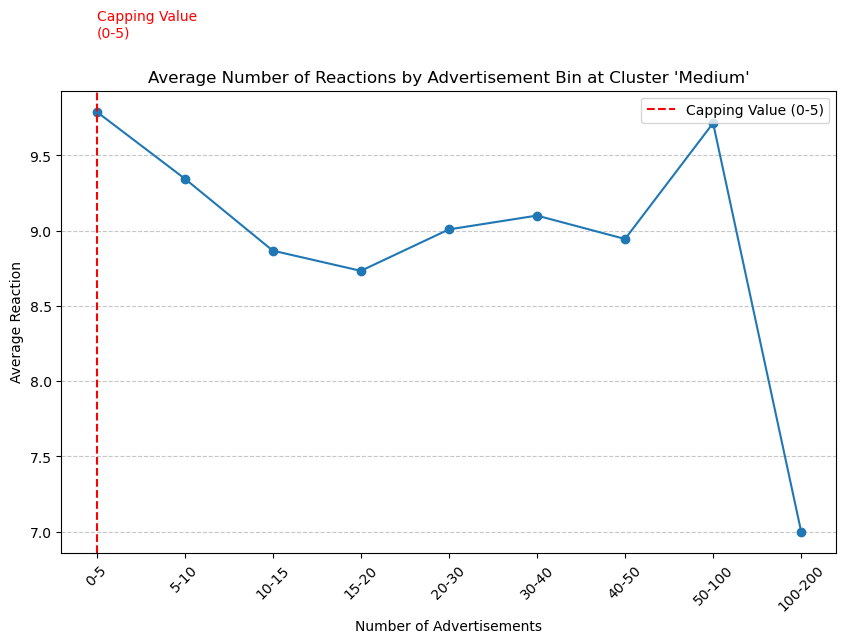

In [224]:
medium_tv_avg_reactions_per_bin = medium.groupby('freq_bins')['freq_react'].mean()
medium_tv_avg_reactions_per_bin_df = medium_tv_avg_reactions_per_bin.reset_index()
medium_tv_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(medium_tv_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
medium_tv_max_reaction_index = medium_tv_avg_reactions_per_bin_df['Average Reactions'].idxmax()
medium_tv_capping_bin = medium_tv_avg_reactions_per_bin_df.iloc[medium_tv_max_reaction_index]['Frequency Bin']
medium_tv_capping_reaction = medium_tv_avg_reactions_per_bin_df.iloc[medium_tv_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(medium_tv_avg_reactions_per_bin_df['Frequency Bin'], medium_tv_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Medium'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=medium_tv_capping_bin, color='red', linestyle='--', label=f"Capping Value ({medium_tv_capping_bin})")
plt.annotate(f'Capping Value\n({medium_tv_capping_bin})', 
             xy=(medium_tv_capping_bin, medium_tv_capping_reaction), 
             xytext=(medium_tv_capping_bin, medium_tv_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The capping value of "freq_tv" is in interval 0 - 5 over customer segment 'medium'.

#### Cluster light

In [225]:
# Create the binned column
light['freq_bins'] = pd.cut(light['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(light[['freq_tv', 'freq_bins']].head())

    freq_tv freq_bins
3         1       0-5
4         4       0-5
9         1       0-5
14        2       0-5
15        6      5-10


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1773783364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['freq_bins'] = pd.cut(light['freq_tv'], bins=bins, labels=labels, right=False)


freq_bins
0-5        2.192831
5-10       2.101801
10-15      2.107296
15-20      2.123134
20-30      1.940678
30-40      2.824324
40-50      2.774194
50-100     2.288889
100-200    3.500000
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1129019485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  light_tv_avg_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()


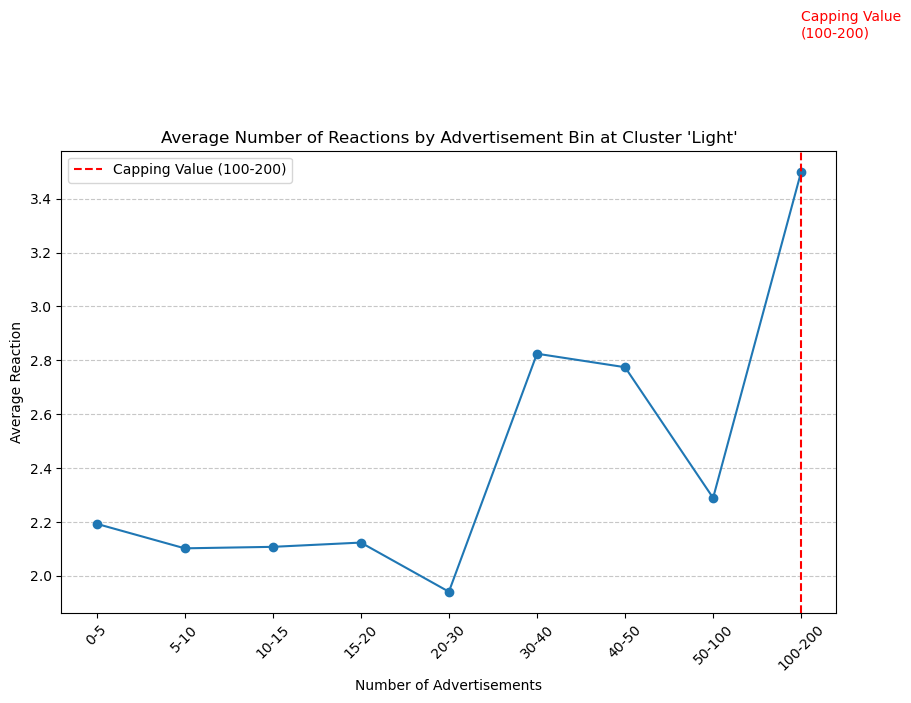

In [226]:
light_tv_avg_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()
light_tv_avg_reactions_per_bin_df = light_tv_avg_reactions_per_bin.reset_index()
light_tv_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(light_tv_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
light_tv_max_reaction_index = light_tv_avg_reactions_per_bin_df['Average Reactions'].idxmax()
light_tv_capping_bin = light_tv_avg_reactions_per_bin_df.iloc[light_tv_max_reaction_index]['Frequency Bin']
light_tv_capping_reaction = light_tv_avg_reactions_per_bin_df.iloc[light_tv_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(light_tv_avg_reactions_per_bin_df['Frequency Bin'], light_tv_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Light'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=light_tv_capping_bin, color='red', linestyle='--', label=f"Capping Value ({light_tv_capping_bin})")
plt.annotate(f'Capping Value\n({light_tv_capping_bin})', 
             xy=(light_tv_capping_bin, light_tv_capping_reaction), 
             xytext=(light_tv_capping_bin, light_tv_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

In [227]:
# Define finer bins between 100 and 200
fine_light_totale_bins = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
fine_light_totale_labels = ["100-110", "110-120", "120-130", "130-140", "140-150", "150-160", "160-170", "170-180", "180-190", "190-200"]

# Create new binned column
light['fine_freq_bins'] = pd.cut(light['freq_tv'], bins=fine_light_totale_bins, labels=fine_light_totale_labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\4000586203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['fine_freq_bins'] = pd.cut(light['freq_tv'], bins=fine_light_totale_bins, labels=fine_light_totale_labels, right=False)


fine_freq_bins
100-110    5.0
110-120    NaN
120-130    NaN
130-140    1.0
140-150    NaN
150-160    3.0
160-170    NaN
170-180    NaN
180-190    NaN
190-200    NaN
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2313116345.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_light_totale_avg_reactions_per_bin = light.groupby('fine_freq_bins')['freq_react'].mean()


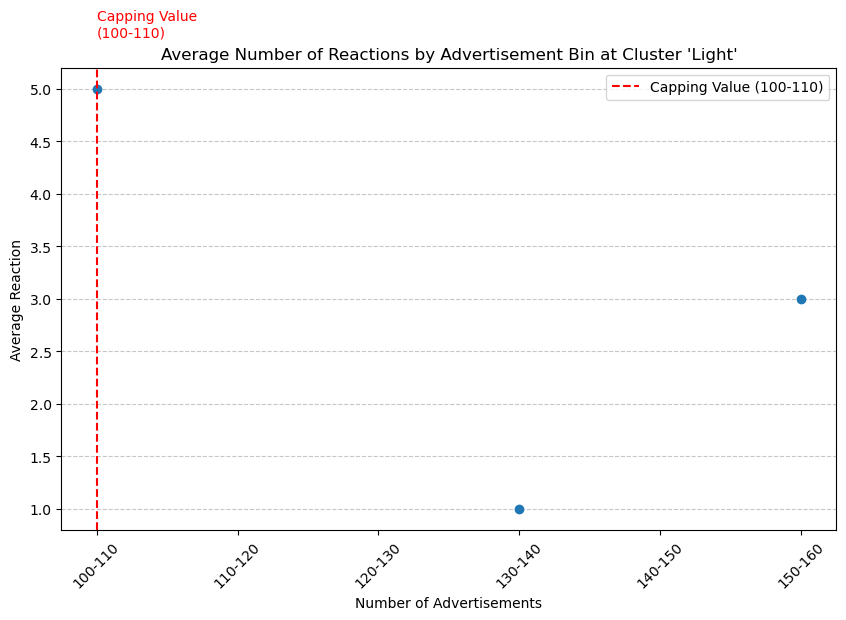

In [228]:
# Calculate the average reactions per finer bin
fine_light_totale_avg_reactions_per_bin = light.groupby('fine_freq_bins')['freq_react'].mean()
fine_light_totale_avg_reactions_per_bin_df = fine_light_totale_avg_reactions_per_bin.reset_index()
fine_light_totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(fine_light_totale_avg_reactions_per_bin)

# Highlight the new capping bin
fine_light_totale_max_reaction_index = fine_light_totale_avg_reactions_per_bin_df['Average Reactions'].idxmax()
fine_light_totale_capping_bin = fine_light_totale_avg_reactions_per_bin_df.iloc[fine_light_totale_max_reaction_index]['Frequency Bin']
fine_light_totale_capping_reaction = fine_light_totale_avg_reactions_per_bin_df.iloc[fine_light_totale_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(fine_light_totale_avg_reactions_per_bin_df['Frequency Bin'], fine_light_totale_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Light'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=fine_light_totale_capping_bin, color='red', linestyle='--', label=f"Capping Value ({fine_light_totale_capping_bin})")
plt.annotate(f'Capping Value\n({fine_light_totale_capping_bin})', 
             xy=(fine_light_totale_capping_bin, fine_light_totale_capping_reaction), 
             xytext=(fine_light_totale_capping_bin, fine_light_totale_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The capping value of "freq_tv" is in interval 100 - 110 over customer segment 'light'.

### Capping Value analysis of "freq_prog"

#### Cluster heavy

In [233]:
# Create the binned column
heavy['freq_bins'] = pd.cut(heavy['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(heavy[['freq_prog', 'freq_bins']].head())

    freq_prog freq_bins
0           1       0-5
2           1       0-5
6           1       0-5
7           2       0-5
10          1       0-5


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1891977983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heavy['freq_bins'] = pd.cut(heavy['freq_prog'], bins=bins, labels=labels, right=False)


freq_bins
0-5        23.335667
5-10       21.179217
10-15      22.893401
15-20      22.315789
20-30      19.609756
30-40      19.619048
40-50      26.384615
50-100     36.444444
100-200          NaN
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\3894244286.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heavy_prog_avg_reactions_per_bin = heavy.groupby('freq_bins')['freq_react'].mean()


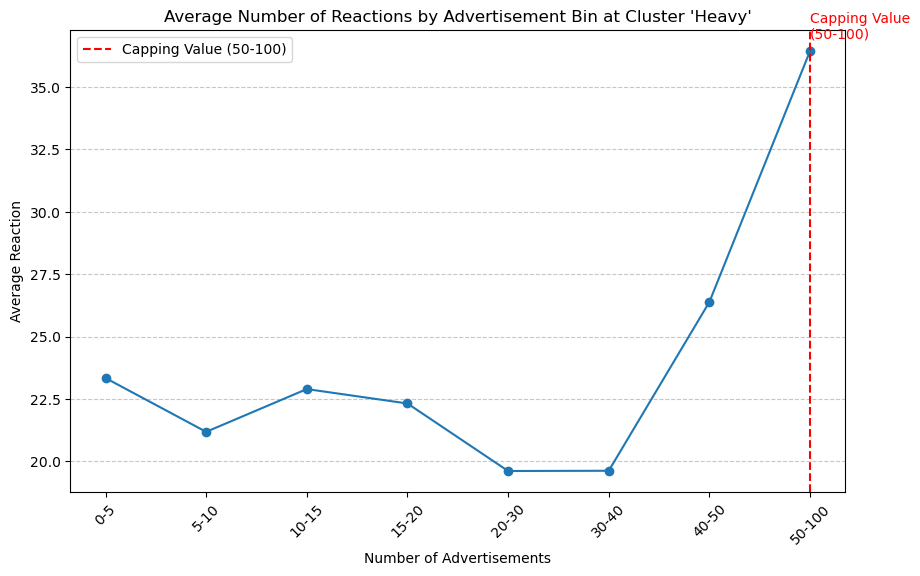

In [259]:
heavy_prog_avg_reactions_per_bin = heavy.groupby('freq_bins')['freq_react'].mean()
heavy_prog_avg_reactions_per_bin_df = heavy_prog_avg_reactions_per_bin.reset_index()
heavy_prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(heavy_prog_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
heavy_prog_max_reaction_index = heavy_prog_avg_reactions_per_bin_df['Average Reactions'].idxmax()
heavy_prog_capping_bin = heavy_prog_avg_reactions_per_bin_df.iloc[heavy_prog_max_reaction_index]['Frequency Bin']
heavy_prog_capping_reaction = heavy_prog_avg_reactions_per_bin_df.iloc[heavy_prog_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(heavy_prog_avg_reactions_per_bin_df['Frequency Bin'], heavy_prog_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Heavy'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=heavy_prog_capping_bin, color='red', linestyle='--', label=f"Capping Value ({heavy_prog_capping_bin})")
plt.annotate(f'Capping Value\n({heavy_prog_capping_bin})', 
             xy=(heavy_prog_capping_bin, heavy_prog_capping_reaction), 
             xytext=(heavy_prog_capping_bin, heavy_prog_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

In [261]:
# Define finer bins between 50 and 100
fine_heavy_prog_bins = [50, 60, 70, 80, 90, 100]
fine_heavy_prog_labels = ["50-60", "60-70", "70-80", "80-90", "90-100"]

# Create new binned column
medium['fine_freq_bins'] = pd.cut(medium['freq_prog'], bins=fine_heavy_prog_bins, labels=fine_heavy_prog_labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\4175594395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fine_freq_bins'] = pd.cut(medium['freq_prog'], bins=fine_heavy_prog_bins, labels=fine_heavy_prog_labels, right=False)


fine_freq_bins
50-60     11.200000
60-70     12.750000
70-80     20.333333
80-90     30.500000
90-100    28.000000
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\3878498032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_heavy_prog_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()


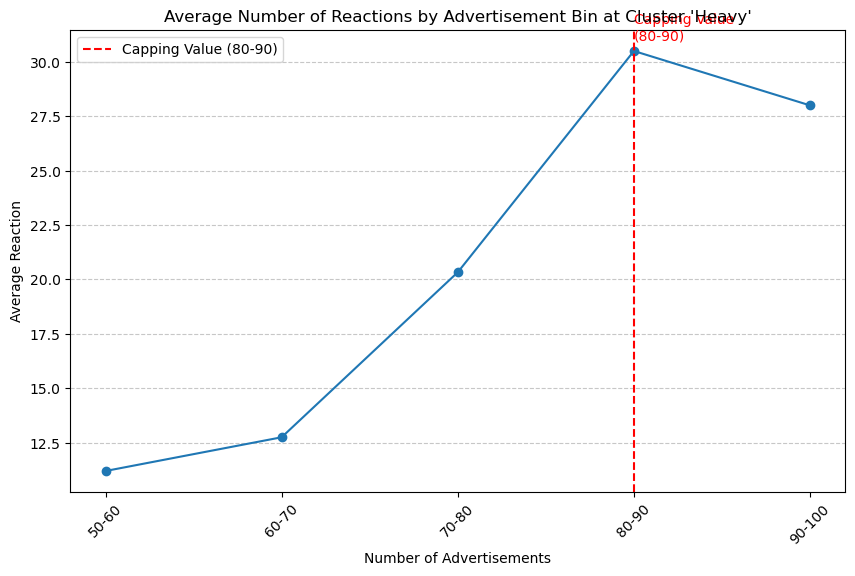

In [263]:
# Calculate the average reactions per finer bin
fine_heavy_prog_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()
fine_heavy_prog_avg_reactions_per_bin_df = fine_heavy_prog_avg_reactions_per_bin.reset_index()
fine_heavy_prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(fine_heavy_prog_avg_reactions_per_bin)

# Highlight the new capping bin
fine_heavy_prog_max_reaction_index = fine_heavy_prog_avg_reactions_per_bin_df['Average Reactions'].idxmax()
fine_heavy_prog_capping_bin = fine_heavy_prog_avg_reactions_per_bin_df.iloc[fine_heavy_prog_max_reaction_index]['Frequency Bin']
fine_heavy_prog_capping_reaction = fine_heavy_prog_avg_reactions_per_bin_df.iloc[fine_heavy_prog_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(fine_heavy_prog_avg_reactions_per_bin_df['Frequency Bin'], fine_heavy_prog_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Heavy'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=fine_heavy_prog_capping_bin, color='red', linestyle='--', label=f"Capping Value ({fine_heavy_prog_capping_bin})")
plt.annotate(f'Capping Value\n({fine_heavy_prog_capping_bin})', 
             xy=(fine_heavy_prog_capping_bin, fine_heavy_prog_capping_reaction), 
             xytext=(fine_heavy_prog_capping_bin, fine_heavy_prog_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

###### Conclusion: The capping value of "freq_prog" is in interval 80 - 90 over customer segment 'heavy'.

#### Cluster medium

In [264]:
# Create the binned column
medium['freq_bins'] = pd.cut(medium['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(medium[['freq_prog', 'freq_bins']].head())

    freq_prog freq_bins
1           1       0-5
5           1       0-5
8           3       0-5
11          6      5-10
12          1       0-5


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1357417386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['freq_bins'] = pd.cut(medium['freq_prog'], bins=bins, labels=labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\3387104154.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medium_prog_avg_reactions_per_bin = medium.groupby('freq_bins')['freq_react'].mean()


freq_bins
0-5         9.261517
5-10       10.785320
10-15      10.944341
15-20      11.923358
20-30      12.300518
30-40       8.586957
40-50       9.300000
50-100     15.650000
100-200     7.000000
Name: freq_react, dtype: float64


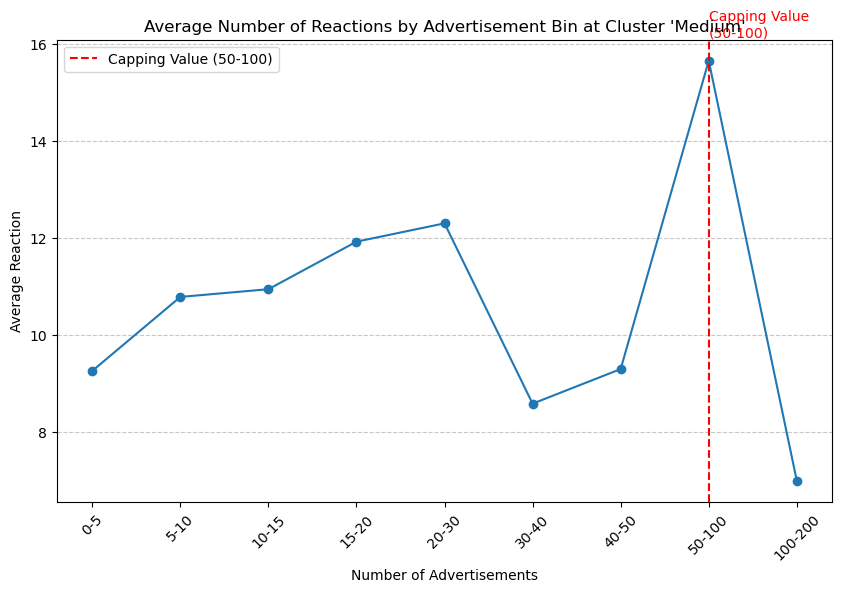

In [266]:
medium_prog_avg_reactions_per_bin = medium.groupby('freq_bins')['freq_react'].mean()
medium_prog_avg_reactions_per_bin_df = medium_prog_avg_reactions_per_bin.reset_index()
medium_prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(medium_prog_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
medium_prog_max_reaction_index = medium_prog_avg_reactions_per_bin_df['Average Reactions'].idxmax()
medium_prog_capping_bin = medium_prog_avg_reactions_per_bin_df.iloc[medium_prog_max_reaction_index]['Frequency Bin']
medium_prog_capping_reaction = medium_prog_avg_reactions_per_bin_df.iloc[medium_prog_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(medium_prog_avg_reactions_per_bin_df['Frequency Bin'], medium_prog_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Medium'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=medium_prog_capping_bin, color='red', linestyle='--', label=f"Capping Value ({medium_prog_capping_bin})")
plt.annotate(f'Capping Value\n({medium_prog_capping_bin})', 
             xy=(medium_prog_capping_bin, medium_prog_capping_reaction), 
             xytext=(medium_prog_capping_bin, medium_prog_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

In [267]:
# Define finer bins between 50 and 100
fine_medium_prog_bins = [50, 60, 70, 80, 90, 100]
fine_medium_prog_labels = ["50-60", "60-70", "70-80", "80-90", "90-100"]

# Create new binned column
medium['fine_freq_bins'] = pd.cut(medium['freq_tv'], bins=fine_medium_prog_bins, labels=fine_medium_prog_labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\180876985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fine_freq_bins'] = pd.cut(medium['freq_tv'], bins=fine_medium_prog_bins, labels=fine_medium_prog_labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2581851818.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_medium_prog_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()


fine_freq_bins
50-60      9.818182
60-70     10.250000
70-80      3.666667
80-90     12.000000
90-100    20.000000
Name: freq_react, dtype: float64


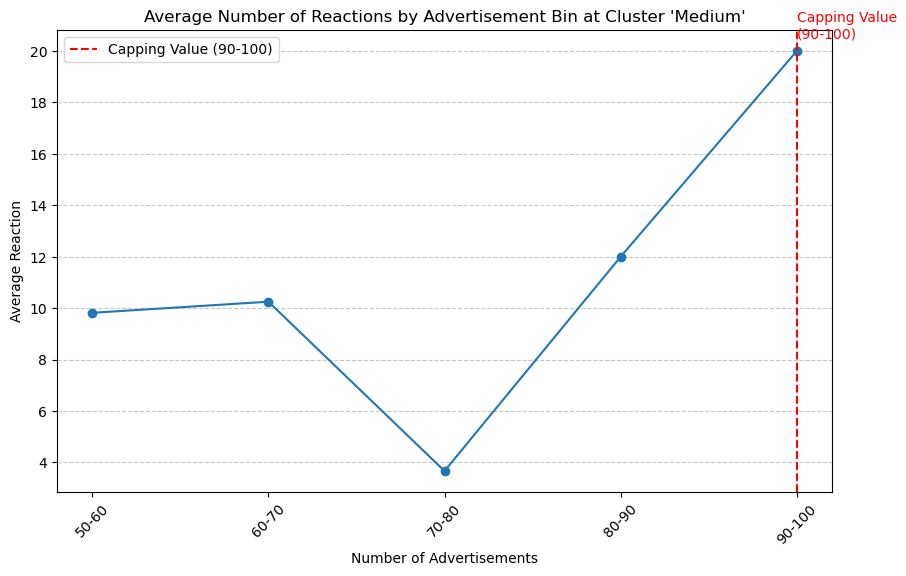

In [268]:
# Calculate the average reactions per finer bin
fine_medium_prog_avg_reactions_per_bin = medium.groupby('fine_freq_bins')['freq_react'].mean()
fine_medium_prog_avg_reactions_per_bin_df = fine_medium_prog_avg_reactions_per_bin.reset_index()
fine_medium_prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(fine_medium_prog_avg_reactions_per_bin)

# Highlight the new capping bin
fine_medium_prog_max_reaction_index = fine_medium_prog_avg_reactions_per_bin_df['Average Reactions'].idxmax()
fine_medium_prog_capping_bin = fine_medium_prog_avg_reactions_per_bin_df.iloc[fine_medium_prog_max_reaction_index]['Frequency Bin']
fine_medium_prog_capping_reaction = fine_medium_prog_avg_reactions_per_bin_df.iloc[fine_medium_prog_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(fine_medium_prog_avg_reactions_per_bin_df['Frequency Bin'], fine_medium_prog_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Medium'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=fine_medium_prog_capping_bin, color='red', linestyle='--', label=f"Capping Value ({fine_medium_prog_capping_bin})")
plt.annotate(f'Capping Value\n({fine_medium_prog_capping_bin})', 
             xy=(fine_medium_prog_capping_bin, fine_medium_prog_capping_reaction), 
             xytext=(fine_medium_prog_capping_bin, fine_medium_prog_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

###### Conclusion: The capping value of "freq_prog" is in interval 90 - 100 over customer segment 'Medium'.

#### Cluster light

In [269]:
# Create the binned column
light['freq_bins'] = pd.cut(light['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(light[['freq_prog', 'freq_bins']].head())

    freq_prog freq_bins
3           2       0-5
4           1       0-5
9           3       0-5
14          1       0-5
15          1       0-5


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\976984192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['freq_bins'] = pd.cut(light['freq_prog'], bins=bins, labels=labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1393797066.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  light_prog_avg_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()


freq_bins
0-5        2.170016
5-10       2.189034
10-15      2.331087
15-20      2.074434
20-30      2.097315
30-40      2.162281
40-50      2.136842
50-100     2.461538
100-200    3.500000
Name: freq_react, dtype: float64


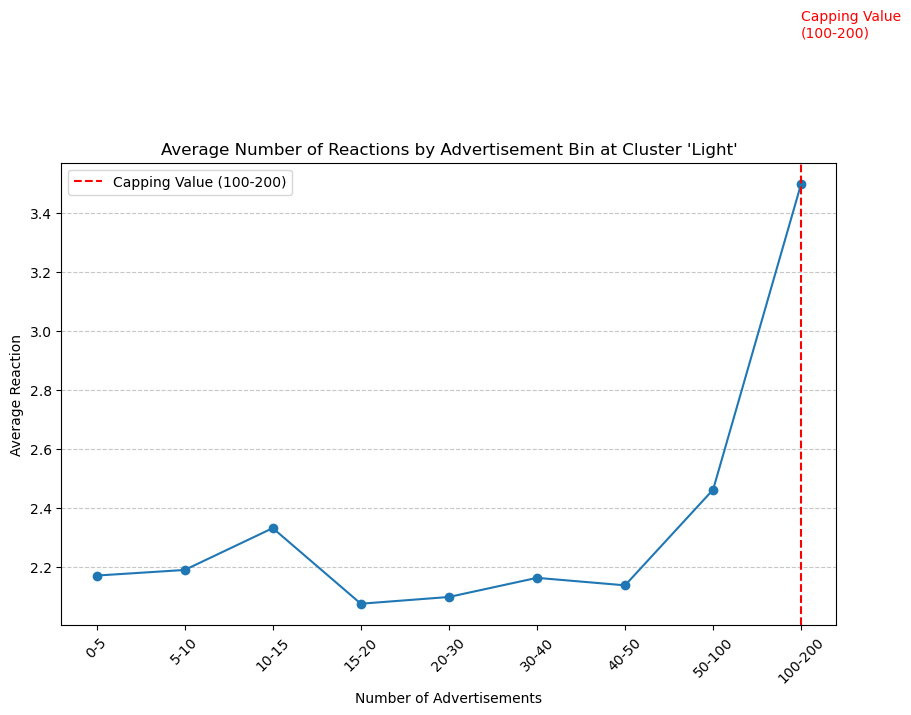

In [270]:
light_prog_avg_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()
light_prog_avg_reactions_per_bin_df = light_prog_avg_reactions_per_bin.reset_index()
light_prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(light_prog_avg_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
light_prog_max_reaction_index = light_prog_avg_reactions_per_bin_df['Average Reactions'].idxmax()
light_prog_capping_bin = light_prog_avg_reactions_per_bin_df.iloc[light_prog_max_reaction_index]['Frequency Bin']
light_prog_capping_reaction = light_prog_avg_reactions_per_bin_df.iloc[light_prog_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(light_prog_avg_reactions_per_bin_df['Frequency Bin'], light_prog_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Light'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=light_prog_capping_bin, color='red', linestyle='--', label=f"Capping Value ({light_prog_capping_bin})")
plt.annotate(f'Capping Value\n({light_prog_capping_bin})', 
             xy=(light_prog_capping_bin, light_prog_capping_reaction), 
             xytext=(light_prog_capping_bin, light_prog_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

In [271]:
# Define finer bins between 100 and 200
fine_light_prog_bins = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
fine_light_prog_labels = ["100-110", "110-120", "120-130", "130-140", "140-150", "150-160", "160-170", "170-180", "180-190", "190-200"]

# Create new binned column
light['fine_freq_bins'] = pd.cut(light['freq_prog'], bins=fine_light_prog_bins, labels=fine_light_prog_labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1177169917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['fine_freq_bins'] = pd.cut(light['freq_prog'], bins=fine_light_prog_bins, labels=fine_light_prog_labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\3627461498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_light_prog_avg_reactions_per_bin = light.groupby('fine_freq_bins')['freq_react'].mean()


fine_freq_bins
100-110    3.0
110-120    5.0
120-130    NaN
130-140    1.0
140-150    NaN
150-160    NaN
160-170    NaN
170-180    NaN
180-190    NaN
190-200    NaN
Name: freq_react, dtype: float64


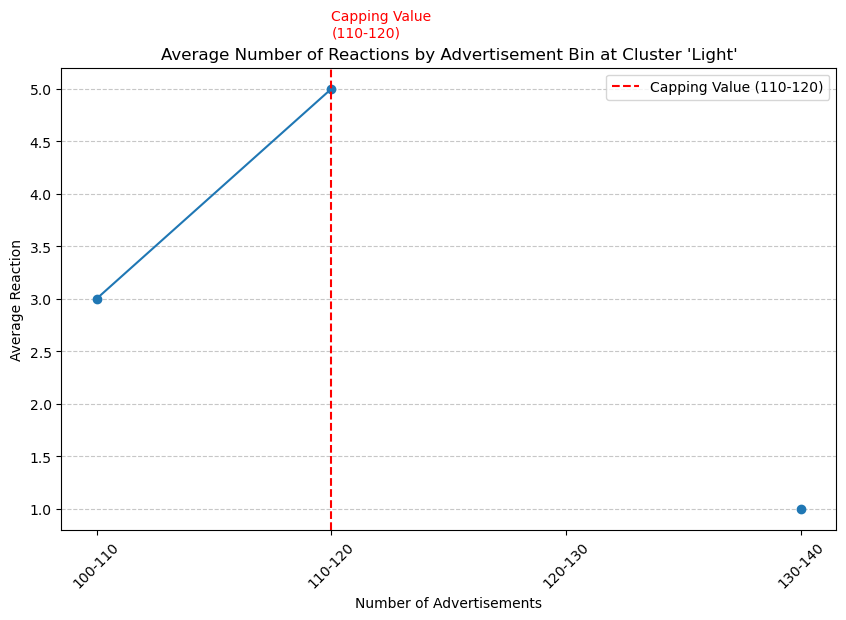

In [272]:
# Calculate the average reactions per finer bin
fine_light_prog_avg_reactions_per_bin = light.groupby('fine_freq_bins')['freq_react'].mean()
fine_light_prog_avg_reactions_per_bin_df = fine_light_prog_avg_reactions_per_bin.reset_index()
fine_light_prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

print(fine_light_prog_avg_reactions_per_bin)

# Highlight the new capping bin
fine_light_prog_max_reaction_index = fine_light_prog_avg_reactions_per_bin_df['Average Reactions'].idxmax()
fine_light_prog_capping_bin = fine_light_prog_avg_reactions_per_bin_df.iloc[fine_light_prog_max_reaction_index]['Frequency Bin']
fine_light_prog_capping_reaction = fine_light_prog_avg_reactions_per_bin_df.iloc[fine_light_prog_max_reaction_index]['Average Reactions']

plt.figure(figsize=(10, 6))
plt.plot(fine_light_prog_avg_reactions_per_bin_df['Frequency Bin'], fine_light_prog_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin at Cluster 'Light'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=fine_light_prog_capping_bin, color='red', linestyle='--', label=f"Capping Value ({fine_light_prog_capping_bin})")
plt.annotate(f'Capping Value\n({fine_light_prog_capping_bin})', 
             xy=(fine_light_prog_capping_bin, fine_light_prog_capping_reaction), 
             xytext=(fine_light_prog_capping_bin, fine_light_prog_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

###### Conclusion: The capping value of "freq_prog" is in interval 110 - 120 over customer segment 'light'.

## Plotting Weighted Cap Curve

In [283]:
# Reuse existing bins for advertisement frequency
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

### Dataset heavy

In [295]:
# Define weights
weight_page_view = 1
weight_add_to_cart = 2
weight_order = 3

# Normalize each attribute to the range [0, 1]
heavy['Product Page View Norm'] = heavy['Product Page View'] / heavy['Product Page View'].max()
heavy['Add to cart Norm'] = heavy['Add to cart'] / heavy['Add to cart'].max()
heavy['Order Norm'] = heavy['Order'] / heavy['Order'].max()

# Calculate the weighted reaction using normalized values
heavy['weighted_reaction'] = (
    heavy['Product Page View Norm'] * weight_page_view +
    heavy['Add to cart Norm'] * weight_add_to_cart +
    heavy['Order Norm'] * weight_order
)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1954476167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heavy['Product Page View Norm'] = heavy['Product Page View'] / heavy['Product Page View'].max()
C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1954476167.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heavy['Add to cart Norm'] = heavy['Add to cart'] / heavy['Add to cart'].max()
C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1954476167.py:9: SettingWithCopyWarning: 
A value is trying to be

### Dataset medium

In [285]:
# Define weights
weight_page_view = 1
weight_add_to_cart = 2
weight_order = 3

# Normalize each attribute to the range [0, 1]
medium['Product Page View Norm'] = medium['Product Page View'] / medium['Product Page View'].max()
medium['Add to cart Norm'] = medium['Add to cart'] / medium['Add to cart'].max()
medium['Order Norm'] = medium['Order'] / medium['Order'].max()

# Calculate the weighted reaction using normalized values
medium['weighted_reaction'] = (
    medium['Product Page View Norm'] * weight_page_view +
    medium['Add to cart Norm'] * weight_add_to_cart +
    medium['Order Norm'] * weight_order
)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\88185579.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['Product Page View Norm'] = medium['Product Page View'] / medium['Product Page View'].max()
C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\88185579.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['Add to cart Norm'] = medium['Add to cart'] / medium['Add to cart'].max()
C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\88185579.py:9: SettingWithCopyWarning: 
A value is trying to be

### Dataset light

In [286]:
# Define weights
weight_page_view = 1
weight_add_to_cart = 2
weight_order = 3

# Normalize each attribute to the range [0, 1]
light['Product Page View Norm'] = light['Product Page View'] / light['Product Page View'].max()
light['Add to cart Norm'] = light['Add to cart'] / light['Add to cart'].max()
light['Order Norm'] = light['Order'] / light['Order'].max()

# Calculate the weighted reaction using normalized values
light['weighted_reaction'] = (
    light['Product Page View Norm'] * weight_page_view +
    light['Add to cart Norm'] * weight_add_to_cart +
    light['Order Norm'] * weight_order
)

C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\753894897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['Product Page View Norm'] = light['Product Page View'] / light['Product Page View'].max()
C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\753894897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['Add to cart Norm'] = light['Add to cart'] / light['Add to cart'].max()
C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\753894897.py:9: SettingWithCopyWarning: 
A value is trying to be se

### Weighted Capping Value analysis of "freq_totale"

#### Cluster heavy

In [289]:
# Bin the freq_total column
heavy['freq_bins'] = pd.cut(heavy['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(heavy[['freq_totale', 'freq_bins']].head())

    freq_totale freq_bins
0             3       0-5
2             2       0-5
6             2       0-5
7            12     10-15
10            2       0-5


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2254857153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heavy['freq_bins'] = pd.cut(heavy['freq_totale'], bins=bins, labels=labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1311926649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heavy_totale_avg_weighted_reactions_per_bin = heavy.groupby('freq_bins')['weighted_reaction'].mean()


freq_bins
0-5        0.530846
5-10       0.529257
10-15      0.554561
15-20      0.595785
20-30      0.644217
30-40      0.730439
40-50      0.521666
50-100     0.577761
100-200         NaN
Name: weighted_reaction, dtype: float64


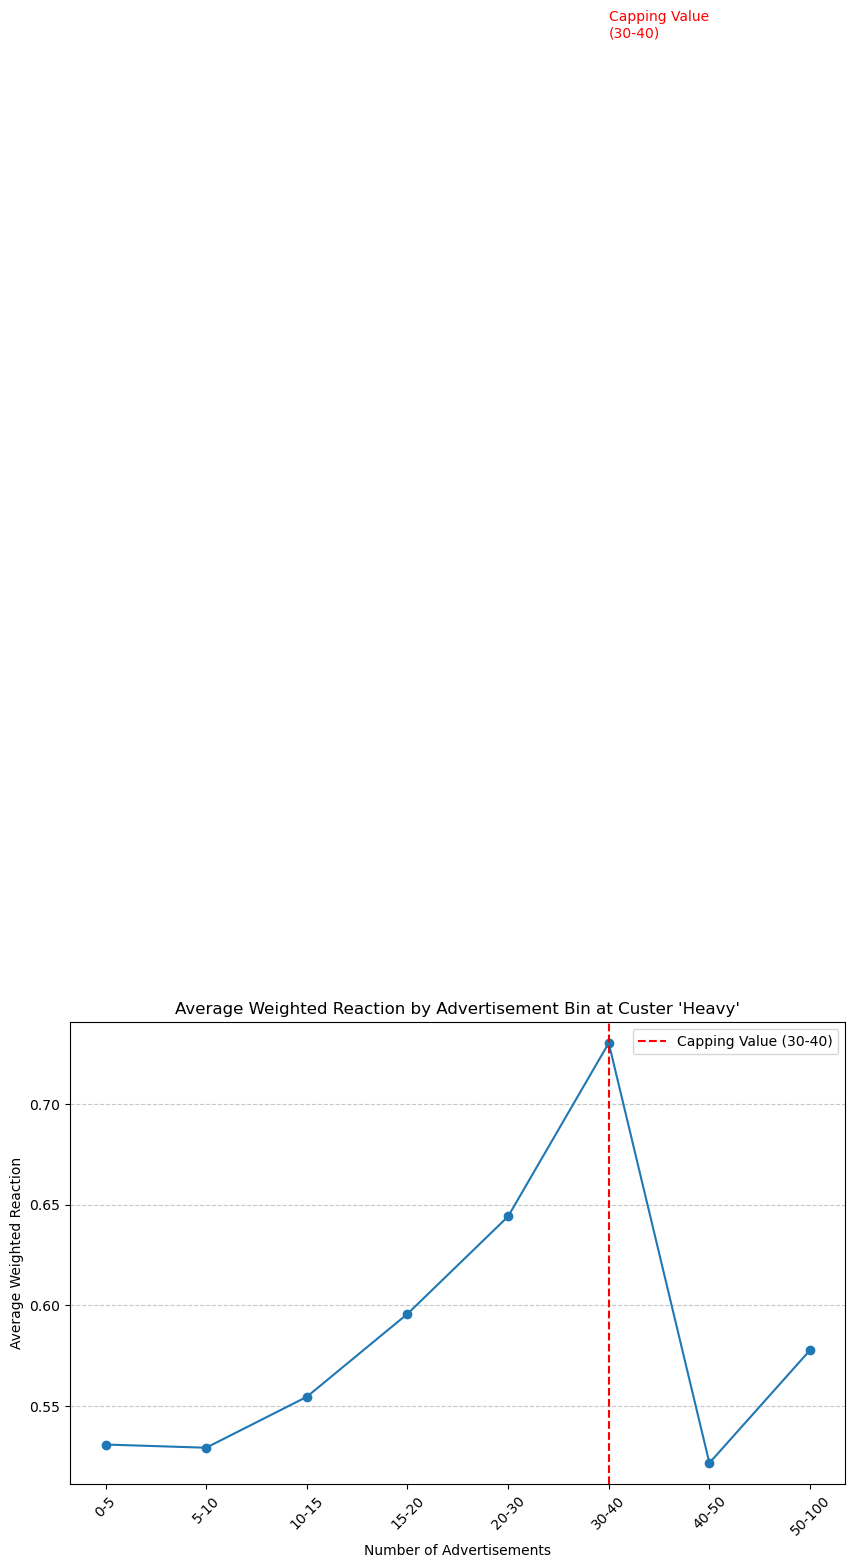

In [292]:
heavy_totale_avg_weighted_reactions_per_bin = heavy.groupby('freq_bins')['weighted_reaction'].mean()
heavy_totale_avg_weighted_reactions_per_bin_df = heavy_totale_avg_weighted_reactions_per_bin.reset_index()
heavy_totale_avg_weighted_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Weighted Reaction']

print(heavy_totale_avg_weighted_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
heavy_totale_weighted_max_reaction_index = heavy_totale_avg_weighted_reactions_per_bin_df['Average Weighted Reaction'].idxmax()
heavy_totale_weighted_capping_bin = heavy_totale_avg_weighted_reactions_per_bin_df.iloc[heavy_totale_weighted_max_reaction_index]['Frequency Bin']
heavy_totale_weighted_capping_reaction = heavy_totale_avg_weighted_reactions_per_bin_df.iloc[heavy_totale_weighted_max_reaction_index]['Average Weighted Reaction']

plt.figure(figsize=(10, 6))
plt.plot(heavy_totale_avg_weighted_reactions_per_bin_df['Frequency Bin'], heavy_totale_avg_weighted_reactions_per_bin_df['Average Weighted Reaction'], marker='o', linestyle='-')
plt.title("Average Weighted Reaction by Advertisement Bin at Custer 'Heavy'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=heavy_totale_weighted_capping_bin, color='red', linestyle='--', label=f"Capping Value ({heavy_totale_weighted_capping_bin})")
plt.annotate(f'Capping Value\n({heavy_totale_weighted_capping_bin})', 
             xy=(heavy_totale_weighted_capping_bin, heavy_totale_weighted_capping_reaction), 
             xytext=(heavy_totale_weighted_capping_bin, heavy_totale_weighted_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

#### Cluster medium

In [293]:
# Bin the freq_total column
medium['freq_bins'] = pd.cut(medium['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(medium[['freq_totale', 'freq_bins']].head())

    freq_totale freq_bins
1             2       0-5
5             5      5-10
8             5      5-10
11            7      5-10
12           13     10-15


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2227767652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['freq_bins'] = pd.cut(medium['freq_totale'], bins=bins, labels=labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\4017859156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medium_totale_avg_weighted_reactions_per_bin = medium.groupby('freq_bins')['weighted_reaction'].mean()


freq_bins
0-5        0.394078
5-10       0.401513
10-15      0.443987
15-20      0.446188
20-30      0.442742
30-40      0.412837
40-50      0.348157
50-100     0.316702
100-200    0.225481
Name: weighted_reaction, dtype: float64


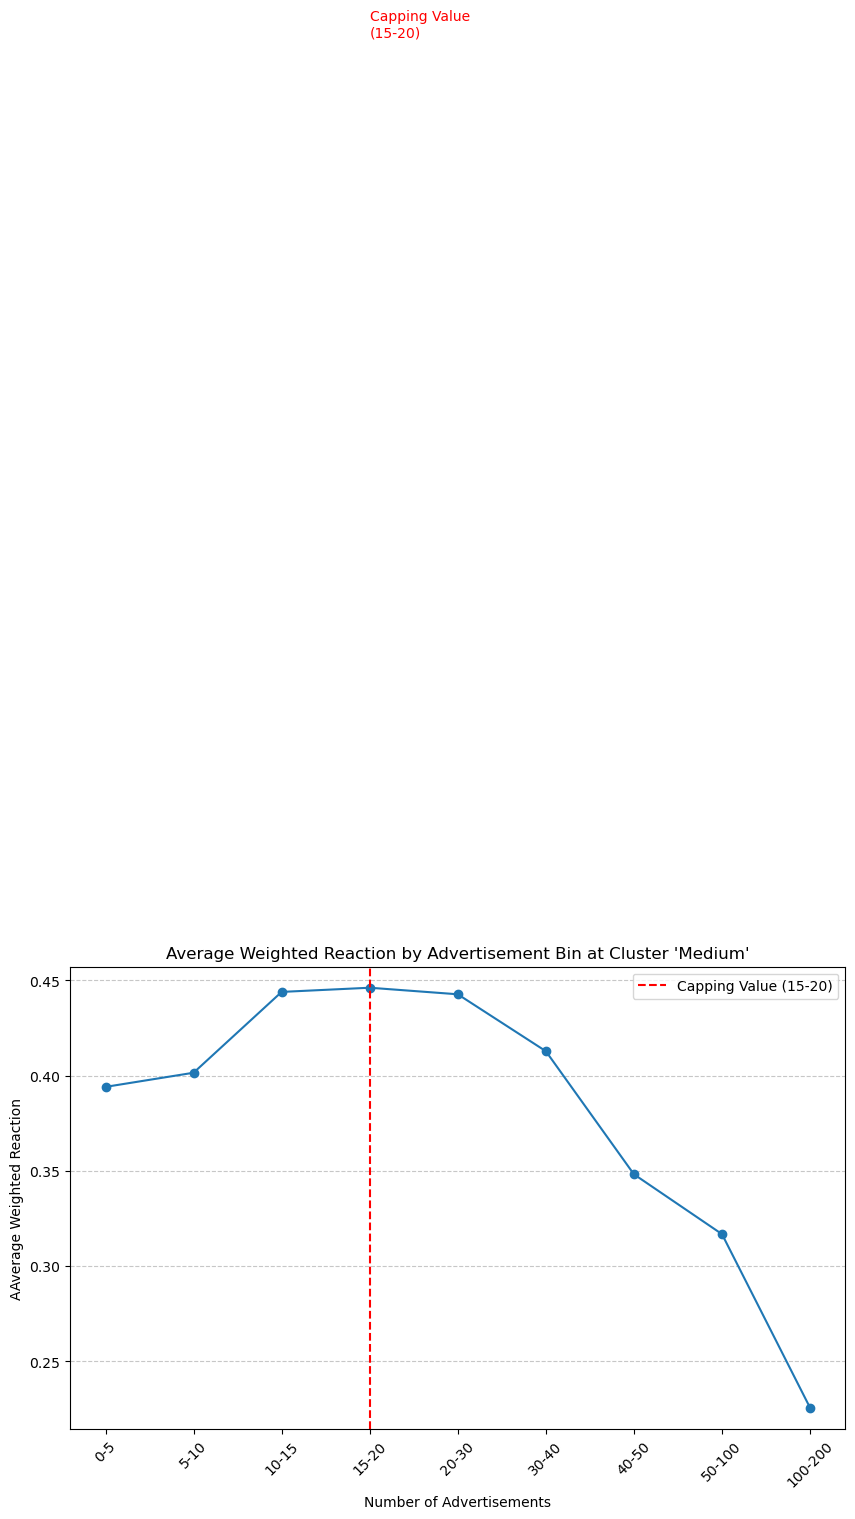

In [294]:
medium_totale_avg_weighted_reactions_per_bin = medium.groupby('freq_bins')['weighted_reaction'].mean()
medium_totale_avg_weighted_reactions_per_bin_df = medium_totale_avg_weighted_reactions_per_bin.reset_index()
medium_totale_avg_weighted_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Weighted Reaction']

print(medium_totale_avg_weighted_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
medium_totale_weighted_max_reaction_index = medium_totale_avg_weighted_reactions_per_bin_df['Average Weighted Reaction'].idxmax()
medium_totale_weighted_capping_bin = medium_totale_avg_weighted_reactions_per_bin_df.iloc[medium_totale_weighted_max_reaction_index]['Frequency Bin']
medium_totale_weighted_capping_reaction = medium_totale_avg_weighted_reactions_per_bin_df.iloc[medium_totale_weighted_max_reaction_index]['Average Weighted Reaction']

plt.figure(figsize=(10, 6))
plt.plot(medium_totale_avg_weighted_reactions_per_bin_df['Frequency Bin'], medium_totale_avg_weighted_reactions_per_bin_df['Average Weighted Reaction'], marker='o', linestyle='-')
plt.title("Average Weighted Reaction by Advertisement Bin at Cluster 'Medium'")
plt.xlabel("Number of Advertisements")
plt.ylabel("AAverage Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=medium_totale_weighted_capping_bin, color='red', linestyle='--', label=f"Capping Value ({medium_totale_weighted_capping_bin})")
plt.annotate(f'Capping Value\n({medium_totale_weighted_capping_bin})', 
             xy=(medium_totale_weighted_capping_bin, medium_totale_weighted_capping_reaction), 
             xytext=(medium_totale_weighted_capping_bin, medium_totale_weighted_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

#### Cluster light

In [296]:
# Bin the freq_total column
light['freq_bins'] = pd.cut(light['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(light[['freq_totale', 'freq_bins']].head())

    freq_totale freq_bins
3             3       0-5
4             5      5-10
9             4       0-5
14            3       0-5
15            7      5-10


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\2775997856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  light['freq_bins'] = pd.cut(light['freq_totale'], bins=bins, labels=labels, right=False)


C:\Users\lenna\AppData\Local\Temp\ipykernel_2200\1425760497.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  light_prog_avg_weighted_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()


freq_bins
0-5        2.186631
5-10       2.171995
10-15      2.204914
15-20      2.163462
20-30      2.072761
30-40      2.051220
40-50      2.403409
50-100     2.401235
100-200    3.222222
Name: freq_react, dtype: float64


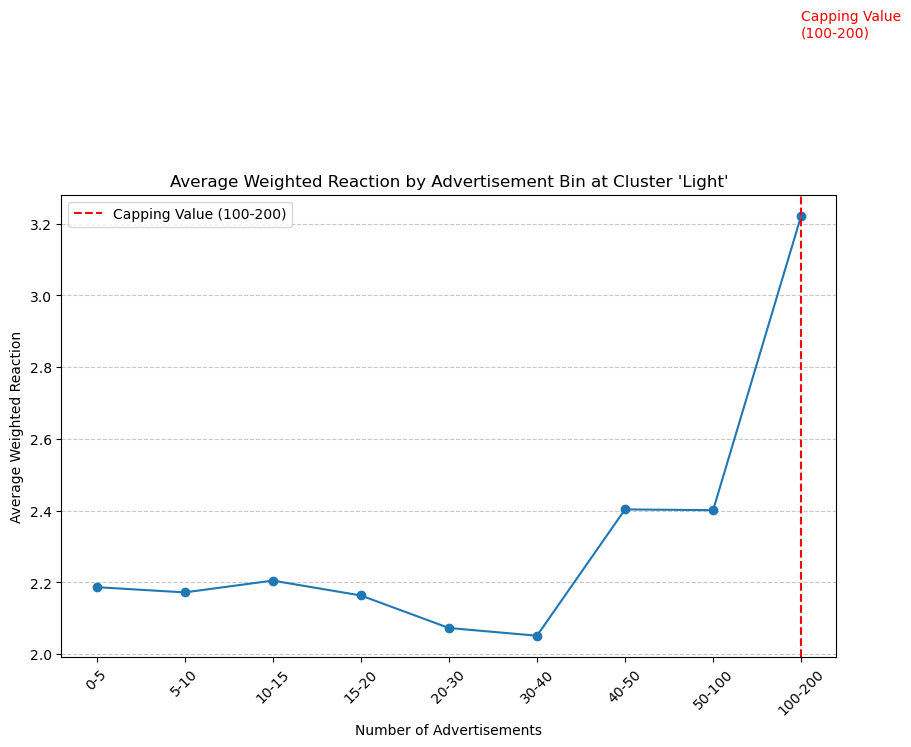

In [297]:
light_prog_avg_weighted_reactions_per_bin = light.groupby('freq_bins')['freq_react'].mean()
light_prog_avg_weighted_reactions_per_bin_df = light_prog_avg_weighted_reactions_per_bin.reset_index()
light_prog_avg_weighted_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Weighted Reaction']

print(light_prog_avg_weighted_reactions_per_bin)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
light_prog_weighted_max_reaction_index = light_prog_avg_weighted_reactions_per_bin_df['Average Weighted Reaction'].idxmax()
light_prog_weighted_capping_bin = light_prog_avg_weighted_reactions_per_bin_df.iloc[light_prog_weighted_max_reaction_index]['Frequency Bin']
light_prog_weighted_capping_reaction = light_prog_avg_weighted_reactions_per_bin_df.iloc[light_prog_weighted_max_reaction_index]['Average Weighted Reaction']

plt.figure(figsize=(10, 6))
plt.plot(light_prog_avg_weighted_reactions_per_bin_df['Frequency Bin'], light_prog_avg_weighted_reactions_per_bin_df['Average Weighted Reaction'], marker='o', linestyle='-')
plt.title("Average Weighted Reaction by Advertisement Bin at Cluster 'Light'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=light_prog_weighted_capping_bin, color='red', linestyle='--', label=f"Capping Value ({light_prog_weighted_capping_bin})")
plt.annotate(f'Capping Value\n({light_prog_weighted_capping_bin})', 
             xy=(light_prog_weighted_capping_bin, light_prog_weighted_capping_reaction), 
             xytext=(light_prog_weighted_capping_bin, light_prog_weighted_capping_reaction + 0.5),
             color='red')

plt.legend()
plt.show()

### Weighted Capping Value analysis of "freq_tv"

#### Cluster heavy

In [ ]:
# Bin the freq_total column
heavy['freq_bins'] = pd.cut(heavy['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(heavy[['freq_tv', 'freq_bins']].head())

#### Cluster medium

In [ ]:
# Bin the freq_total column
medium['freq_bins'] = pd.cut(medium['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(medium[['freq_tv', 'freq_bins']].head())

#### Cluster light

In [ ]:
# Bin the freq_total column
light['freq_bins'] = pd.cut(light['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(light[['freq_tv', 'freq_bins']].head())

### Weighted Capping Value analysis of "freq_prog"

#### Cluster heavy

In [ ]:
# Bin the freq_total column
heavy['freq_bins'] = pd.cut(heavy['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(heavy[['freq_prog', 'freq_bins']].head())

#### Cluster medium

In [ ]:
# Bin the freq_total column
medium['freq_bins'] = pd.cut(medium['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(medium[['freq_prog', 'freq_bins']].head())

#### CLuster light

In [ ]:
# Bin the freq_total column
light['freq_bins'] = pd.cut(light['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(light[['freq_prog', 'freq_bins']].head())